In [3]:
#import the  dependencies
import numpy  as np
import matplotlib.pylab as plt

In [2]:
#import the  dependencies
import torchvision
import torchvision.transforms as transforms

# Define transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data
])

# Load the MNIST training dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load the MNIST test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

torch.Size([28, 28])


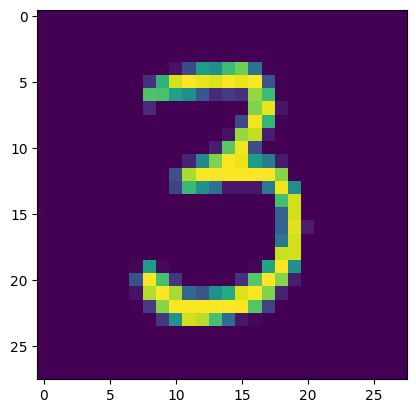

In [81]:
#test
plt.imshow(train_dataset.data[50])
print(train_dataset.data[50].shape)

In [90]:
import torch.nn as nn
import torch
# creating the ai model for digits classifications
class Mnist_model(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.l1 = nn.Linear(28*28,100,bias=False)
        self.relu  = nn.ReLU()
        self.l2 = nn.Linear(100,10,bias=False)
    def forward(self,x):
        x= self.relu(self.l1(x))
        x= self.l2(x)
        return x
pytorch_model =  Mnist_model()


In [25]:
#testing and note that the shape of minst image is (1,28,28) 3d and you should turn it into (1,28*28) 2d
pytorch_model(torch.tensor(train_dataset.data[0].reshape(1,28*28).clone().detach(),dtype= torch.float))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7488\1698054874.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pytorch_model(torch.tensor(train_dataset.data[0].reshape(1,28*28).clone().detach(),dtype= torch.float))


tensor([[ 0.0000,  3.7378, 22.3853,  0.0000, 11.6895,  0.0000,  0.0000,  1.9031,
          0.0000,  0.0000]], grad_fn=<ReluBackward0>)

In [164]:
#the training loop
batch_size  = 200
loss   = nn.CrossEntropyLoss()
optimizer  = torch.optim.AdamW(pytorch_model.parameters(),lr=1e-4)
ii=0
total = 0
for i  in range(500):
    ii+=1
    index  =  np.random.randint(0,train_dataset.data.shape[0],size=batch_size)
    optimizer.zero_grad()
    x= train_dataset.data[index]
    out = pytorch_model(x.reshape(-1,28*28).float().clone().detach())
    target =  train_dataset.targets[index]
    lol = loss(out,target)
    lol.backward()
    total +=lol
    
    optimizer.step()
    if ii%10==0:
        print(total/10)
        total=0
        ii=0




tensor(0.0251, grad_fn=<DivBackward0>)
tensor(0.0217, grad_fn=<DivBackward0>)
tensor(0.0227, grad_fn=<DivBackward0>)
tensor(0.0311, grad_fn=<DivBackward0>)
tensor(0.0375, grad_fn=<DivBackward0>)
tensor(0.0367, grad_fn=<DivBackward0>)
tensor(0.0284, grad_fn=<DivBackward0>)
tensor(0.0282, grad_fn=<DivBackward0>)
tensor(0.0237, grad_fn=<DivBackward0>)
tensor(0.0235, grad_fn=<DivBackward0>)
tensor(0.0349, grad_fn=<DivBackward0>)
tensor(0.0161, grad_fn=<DivBackward0>)
tensor(0.0245, grad_fn=<DivBackward0>)
tensor(0.0167, grad_fn=<DivBackward0>)
tensor(0.0249, grad_fn=<DivBackward0>)
tensor(0.0356, grad_fn=<DivBackward0>)
tensor(0.0236, grad_fn=<DivBackward0>)
tensor(0.0369, grad_fn=<DivBackward0>)
tensor(0.0336, grad_fn=<DivBackward0>)
tensor(0.0165, grad_fn=<DivBackward0>)
tensor(0.0128, grad_fn=<DivBackward0>)
tensor(0.0278, grad_fn=<DivBackward0>)
tensor(0.0211, grad_fn=<DivBackward0>)
tensor(0.0245, grad_fn=<DivBackward0>)
tensor(0.0267, grad_fn=<DivBackward0>)
tensor(0.0286, grad_fn=<D

tensor([[ -6.9275,   8.2241,  16.6399,   4.4193, -13.2384, -10.6700,   2.2561,
         -12.7792,   0.7643, -10.5441]], grad_fn=<MmBackward0>)
prediction tensor(2)
 label  tensor([2])


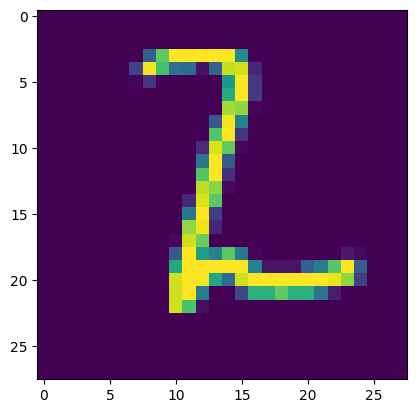

In [103]:
# this is for plating the image and compiring the label  with the model predictions
find = np.random.randint(0,train_dataset.data.shape[0],size=1)
result  = pytorch_model(train_dataset.data[find].float().view(-1,28*28))
plt.imshow(train_dataset.data[find].squeeze())
print(result)
print("prediction",result.argmax())
print(" label ",train_dataset.targets[find])


In [ ]:
# note  that you can use cuda for faster training but in our case for traing the Mnist model the cpu is good